> Estudo/Resumo do Capítulo 1 do livro: $\textit{Machine Learning and Deep Learning with Python, sckit-learn, and TensorFlow2}$ dos autores $Sebastian Raschka$ e $Vahid Mirjalili$.

> $\textbf{OBSERVAÇÃO}$: Este resumo tem como objetivo final apenas o estudo pessoal do livro em questão.

> O livro pode ser adquirido em: https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1789955750

# 1. Resumo: Os três tipos diferentes de Machine Learning

> 1. Apredizado supervisionado;
>> dados com labels (rótulos);

>> feedbacks diretos;

>> prever resultados/futuro;


> 2. Aprendizado não-supervisionado;
>> dados sem labels;

>> sem feedbacks;

>> encontrar estruturas escondidados/ocultas em dados;


> 3. Aprendizado por reforço

>> processos de decisão;

>> sistema com base em recompensa;

>> aprender através de ações em série;

# 2. Aprendizado supervisionado - efetuar predições sobre o futuro

> Objetivo principal: criar um modelo a partir de dados de treino nomeados (com labels), que nos permitira fazer predições sobre outros dados ou dados futuros. Aqui, o termo supervisionado se refere ao set de dados de treino (dados de entrada) onde o resultado de saída desejado (labels) já são conhecidas.

\begin{CD}
@. @.\fcolorbox{white}{transparent}{$Labels$} @. @.\\
@. @.\text{Dados de treino} @.@.\\
@. @VVV @. @.\\
@. @.\fcolorbox{white}{transparent}{$\text{Algoritmo Machine Learning}$} @. @.\\
@. @VVV @. @.\\
@.\text{Novos dados} @>>>\fcolorbox{white}{transparent}{$\text{Modelo}$} @>>> \text{Predição} @.\\
\end{CD}

## 2.1. Classificação

> 1. é uma subcategoria do aprendizado supervisionado;

> 2. objetivo de prever um rótulo (labels) de novas instâncias baseadas na observação dos dados passados.

> 3. classe de valores discretos, geralmente desordenados que podem ser entendidos como as associações de grupos das instâncias.

> 4. Ex.: detecção de spam de e-mail. Que é uma tarefa de classificação binária, onde o algoritmo de ML aprende um conjunto de regras para distinguir entre duas classes possíveis: e-mails de spam e não spam;

### 2.1.1. Exemplo conjunto de dados bidimensionais

A figura a seguir ilustra o conceito de uma tarefa de classificação binária com alguns dados de treino; Na figura Temos dois rótulos (labels) $x$ azuis e "círculos" vermelhos.

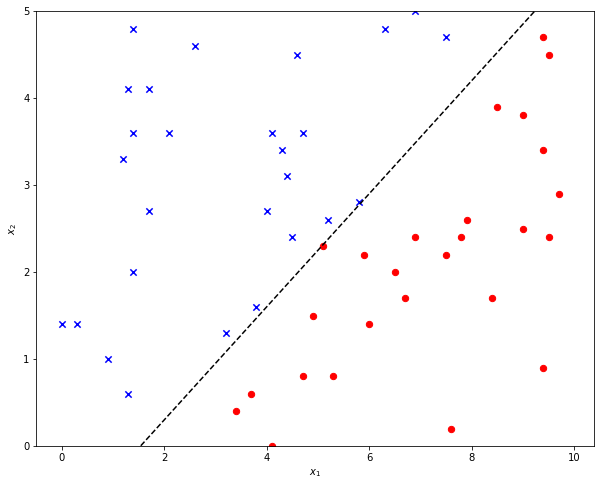

In [120]:
#!python 3.10.4 64-bit
#OBS.: grafico criado apenas para visualização do problema.

import numpy as np
import matplotlib.pyplot as plt

def y(x):
    return 0.65*x - 1.0

x = np.arange(0, 10, 0.5)
counter = 0 
num_of_points = 100

plt.figure(figsize=(10,8))

while counter < num_of_points:
    counter += 1
    rnd_data_x1, rnd_data_x2 = (np.random.choice(np.arange(0,10.1, 0.1)), np.random.choice(np.arange(0,10.1, 0.1)))

    if rnd_data_x2 > y(rnd_data_x1):
        marker = 'x'
        color = 'blue'
    else:
        marker = 'o'
        color = 'red'

    plt.scatter(rnd_data_x1, rnd_data_x2, marker=marker, color=color, s=40)   

plt.plot(x, y(x), 'k--')
plt.ylim([0, 5])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()



Nesse cenário, cada dado possui dois valores associados a ele: $x_1$ e $x_2$. Agora, podemos usar um algoritmo de aprendizado de máquina supervisionado para aprender uma regra - o limite de decisão representado como uma linha tracejada - que pode separar essas duas classes e classificar novos dados em cada uma dessas duas categorias, considerando seus valores $x_1$ e $x_2$:

### 2.1.2. Observação importante:

> Não necessariamento um conjunto de dados será binário. Para tratar estes casos com múltiplas dimensões, fazemos o uso da $\textbf{classificação multidimensional}$. Ex.: 

>> Conjunto de dados consistindo em várias escritas "a mão" de cada letra no alfabeto por diferentes pessoas. As letras ("A", "B", "C" e assim por diante) representarão as diferentes categorias não-ordenadas ou rótulos de classe que queremos prever. Quando um usuário fornecer um novo caractere escrito a mão, nosso modelo preditivo será capaz de prever a letra correta no alfabeto com certa precisão.

>> Obs.: No entanto, nosso sistema de aprendizado de máquina será incapaz de reconhecer corretamente qualquer um dos os dígitos entre 0 e 9, por exemplo, se eles não faziam parte do conjunto de dados de treinamento.

## 2.2. Regressão: prever resultados contínuos

> Na análise de regressão, recebemos um número de variáveis preditoras (explicativas) e uma variável de resposta contínua (resultado), e tentamos encontrar uma relação entre essas variáveis que nos permita prever um resultado;

> as variáveis preditoras são comumente chamadas de "recursos (features)" e as variáveis de resposta geralmente são chamadas de "variáveis alvo (target variables)".

> A figura a seguir ilustra o conceito de regressão linear. Dada uma $\text{feature}$, $x$, e uma $\text{target variable}$, $y$, ajustamos uma linha reta a esses dados que minimiza a distância - mais comumente a distância quadrada média - entre os pontos de dados e a linha ajustada. Podemos usar a interceptação e a inclinação aprendidas com esses dados para prever a variável de destino de novos dados.

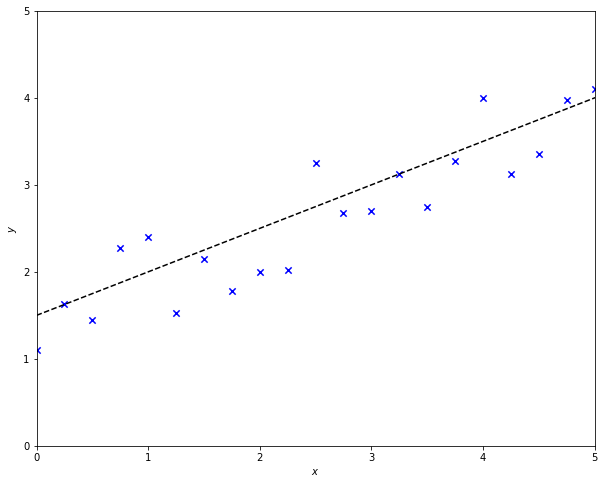

In [116]:
#OBS.: grafico criado apenas para visualização do problema.

import numpy as np
import matplotlib.pyplot as plt

def y2(x):
    return 0.5*x + 1.5

plt.figure(figsize=(10,8))

x = np.arange(0, 6, 0.25)
noise = [np.random.choice(np.arange(-0.6, 0.6, 0.1)) for x in range(0, len(x))]

plt.plot(x, y2(x), 'k--')
plt.scatter(x, y2(x)+noise, marker='x', color='blue', s=40)
plt.ylim([0, 5])
plt.xlim([0, 5])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# 3. Aprendizado por reforço: Resolvendo problemas interativos

> O Objetivo do apredizado por reforço é desenvolver um sistema (agente, do inglês agent) e melhorar a sua performance baseada na interação com o ambiente (environment);

> No aprendizado de reforço temos o conceito de 'sinal de recompensa'. Que é uma medida de quão bem a ação foi medida por uma 'função de recompensa';

> Ou seja, Através da interação com o ambiente, um agente pode então usar do aprendizado de reforça par apredener um série de ações que maximizam a recompensa através de abordagens de tentativa-e-erro "exploratória" ou de um determinado planejamento;

> Um popular exemplo de aprendizado por reforço é uma máquina que aprende a jogar xadrez. O agente vai decidir uma série de jogadas e movimentações das peças dependendo do estado do tabuleiro (o ambiente), o 'sinal de recompensa' aqui pode ser definido como $\text{vencer}$ ou $\text{perder}$ o jogo.


\begin{CD}
@<<< @<<< \fcolorbox{white}{transparent}{$Ambiente$}\\
@VRecompensaVV @VEstadoVV @AA\text{A}\c{c}ãoA\\
@>>> \fcolorbox{white}{transparent}{$Agente$} @>>>
\end{CD}


> De forma geral, o $\text{Agente}$ tenta maximizar a recompensa através de uma série de interações com o $\text{Ambiente}$. Cada $\text{Estado}$ pode ser associado a uma $\text{Recompensa}$ "positiva" ou "negativa", e uma recompensa pode ser definida como alcançar um objetivo geral, como ganhar ou perder um jogo de xadrez. Por exemplo, no xadrez, o resultado de cada movimento pode ser considerado como um estado diferente do meio ambiente.

> O aprendizado por reforço está preocupado em aprender a escolher uma série de ações que maximize a recompensa total, que pode ser obtida imediatamente após a execução de uma ação ou por meio de feedback atrasado.

## 3.1. Explorando um pouco mais o exemplo do jogo de xadrez para enterder os desafios do Aprendizado por reforço

> vamos pensar em configurações no tabuleiro de xadrez:

>>  A. $\text{estados que provavelmente levarão à vitória}$ - por exemplo, remover do tabuleiro a peça de xadrez de um oponente ou ameaçar a rainha;

>> B. $\text{estados que provavelmente resultarão na perda do jogo}$ - como perder uma peça de xadrez para o oponente;

>No jogo de xadrez, a recompensa (seja positiva por vencer ou negativa por perder o jogo) não será dada até o final do jogo. Além disso, a recompensa final também dependerá de como o oponente joga. Por exemplo, o oponente pode sacrificar a rainha, mas eventualmente vencer o jogo.

# 4. Aprendizado não-supervisionado: descobrindo estruturas ocultas

> Diferente da da aprendizagem supervisionada - onde sabemos a resposta certa de antemão quando treinamos um modelo; ou da aprendizagem reforçada - na qual definimos uma medida de recompensa por ações particulares realizadas pelo agente;  No aprendizado não-supervisionado estamos lidando com dados não rotulados (sem labels) ou dados de estrutura desconhecida;

> Usando técnicas de aprendizagem não-supervisionadas, somos capazes de explorar a estrutura de nossos dados para extrair informações significativas sem a orientação de uma variável de resultado conhecida ou função de recompensa.

## 4.1. Descobrindo subgrupos com a Clusterização

> $\textbf{Clusterização}$ (do inglês, $clustering$) é uma técnica exploratória de análise de dados que nos permite organizar uma pilha/conjunto de informações em subgrupos significativos (chamados de clusters) sem ter nenhum conhecimento prévio de seus membros de grupo;

> Cada cluster que surge durante a análise define um grupo de objetos (ou dados) que compartilham um certo grau de similaridade, mas são mais diferentes de objetos de outros clusters;

> A clusterização também é chamada de classificação não supervisionada. 

> A clusterização é uma ótima técnica para estruturar informações e derivar relacionamentos significativos de dados. Exemplo: profissionais de marketing podem descubrir grupos de clientes com base em seus interesses, a fim de desenvolver programas de marketing distintos.

A figura abaixo mostra como que a clusterização pode ser aplicada para organizar dados não rotulados ($unlabeled$) de três grupos distintos baseado em suas similaridades das $features$ $x_1$ e $x_2$:

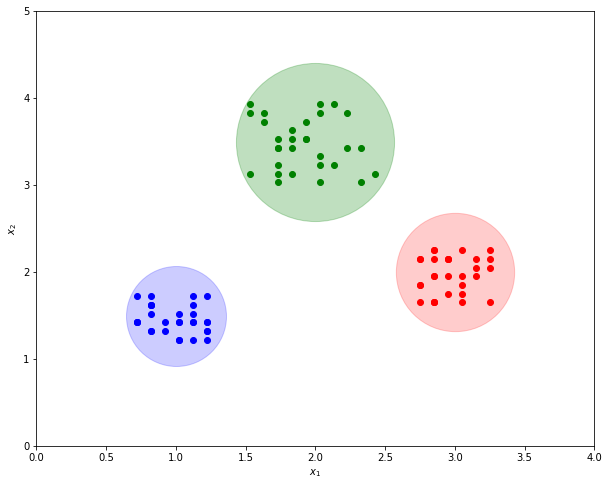

In [185]:
#OBS.: código beeeem simplificado apenas para visualização gráfica da clusterização.

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

center_circle1 = (2.0, 3.5)
center_circle2 = (1.0, 1.5)
center_circle3 = (3.0, 2.0)

noise1_1 = [center_circle1[0] + np.random.choice(np.arange(-0.47, 0.47, 0.1)) for x in range(0, 30)]
noise1_2 = [center_circle1[1] + np.random.choice(np.arange(-0.47, 0.47, 0.1)) for x in range(0, 30)]
noise2_1 = [center_circle2[0] + np.random.choice(np.arange(-0.28, 0.28, 0.1)) for x in range(0, 30)]
noise2_2 = [center_circle2[1] + np.random.choice(np.arange(-0.28, 0.28, 0.1)) for x in range(0, 30)]
noise3_1 = [center_circle3[0] + np.random.choice(np.arange(-0.35, 0.35, 0.1)) for x in range(0, 30)]
noise3_2 = [center_circle3[1] + np.random.choice(np.arange(-0.35, 0.35, 0.1)) for x in range(0, 30)]

plt.scatter(center_circle1[0], center_circle1[1], color = 'green', marker = 'o', s = 25000, alpha = 0.25)
plt.scatter(center_circle2[0], center_circle2[1], color = 'blue', marker = 'o', s = 10000, alpha = 0.20)
plt.scatter(center_circle3[0], center_circle3[1], color = 'red', marker = 'o', s = 14000, alpha = 0.20)

plt.scatter(noise1_1, noise1_2, color = 'green', marker = 'o')
plt.scatter(noise2_1, noise2_2, color = 'blue', marker = 'o')
plt.scatter(noise3_1, noise3_2, color = 'red', marker = 'o')

plt.ylim([0, 5])
plt.xlim([0, 4])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.show()

## 4.2  Redução de dimensionalidade: compressão de dados

> Subcampo do aprendizado não-supervisionado;

> A alta dimensionalidade pode apresentar um desafio para o espaço de armazenamento limitado e o desempenho computacional dos algoritmos de Machine learning (ML);

> A redução de dimensionalidade não-supervisionada é uma abordagem comumente usada no $\textbf{pré-processamento}$ de recursos para remover ruídos dos dados, o que pode degradar o desempenho preditivo de certos algoritmos e compactar os dados em um subespaço dimensional menor, mantendo apenas as informações relevantes.

Analisando apenas todas as dimensões:


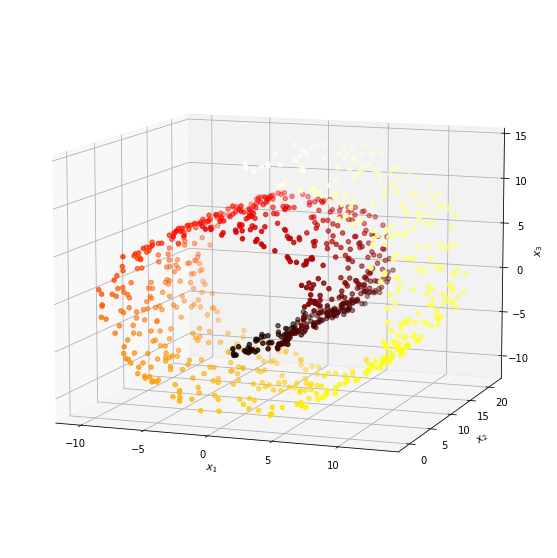

Exemplo, analisando apenas duas dimensões:


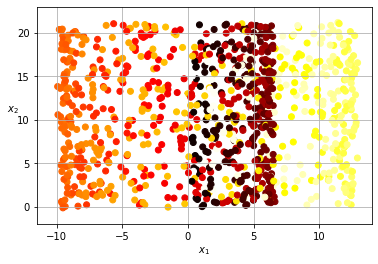

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

print('Analisando apenas todas as dimensões:')
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()
print('Exemplo, analisando apenas duas dimensões:')
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid(True)

plt.show()

# 5. Nomenclatura e convenção 

<img src='figuras\nomenclatura.jpg'/>

> cada amostra $\textbf{Samples}$ é representada por uma linha da tabela $\textbf{Dataset}$. Cada amostra tem colunas $\textbf{Features}$ que contêm os atributos/dimensões, geralmente representado pelo eixo $X$. E o  eixo $Y$ é representado pela $\textbf{Class Labels}$ targets, ou, do português, os rótulos;

> $\textbf{Exemplo}$: considere um dataset com 150 exemplos de flores Iris. cada amostra contendo quatro features. 

>> Podemos representar esses dados como uma matriz $\text{150 x 4}$, $\it{X}$ $\epsilon$ $\reals^{\text{150 x 4}}$:

   \begin{bmatrix}
      {x_1}^{(1)} & {x_2}^{(1)} & {x_3}^{(1)} & {x_4}^{(1)}\\
      {x_1}^{(2)} & {x_2}^{(2)} & {x_3}^{(2)} & {x_4}^{(2)}\\
      \vdots & \vdots & \vdots & \vdots \\
      {x_1}^{(150)} & {x_2}^{(150)} & {x_3}^{(150)} & {x_4}^{(150)}\\
   \end{bmatrix},
   
   $\textbf{Notação:}$

   >> dado a notação ${x_j^{(i)}}$:
   
   >>> O sobreescrito $i$ refere-se ao $i$-ésima amostra de treinamento;

   >>> O subescrito $j$ se refere a $j$-ésima dimensão do dataset;

   >> Exemplo 1:

   >>> $x^{(i)}$ $\epsilon$ $\reals^{1x4}$ $\rightarrow$ Representa um vetor/linha da $i$-ésima amostra contendo as 4 dimensões

   \begin{align*}
   x^{(i)} = 
    \begin{bmatrix}
    {x_1}^{(i)} & {x_2}^{(i)} & {x_3}^{(i)} & {x_4}^{(i)}
    \end{bmatrix}
   \end{align*}
 
   >> Exemplo 2:

   >>> $x_{j}$ $\epsilon$ $\reals^{150x1}$ $\rightarrow$ Representa um vetor/coluna dcom todas as amostras da $j$-ésima feature (dimensão)

   \begin{align*}
   x_{j} = 
    \begin{bmatrix}
    {x_j}^{(1)}\\ {x_j}^{(2)} \\ {x_j}^{(3)} \\ \vdots \\ {x_j}^{(150)}
    \end{bmatrix}
   \end{align*}

   >>> O mesmo se aplica para as dimensões dos variáveis alvos (targets)

   \begin{align*}
   y = 
    \begin{bmatrix}
    {y}^{(1)}\\ {y}^{(2)} \\ \vdots \\ {y}^{(150)}
    \end{bmatrix}, (y \space \epsilon \text{\{Setosa, Versicolor, Virginica\}})
   \end{align*}

   >> Exemplo 3:

   >>> Temos ainda outras notações interessantes:

   >>>> Matrizes:   
   \begin{align*}
   \textbf{X}\space\epsilon\space\reals^{n \times m}
   \end{align*};

   >>>> Elementos únicos: $x^{(n)}$ ou ainda $x_m^{(n)}$;

# 6. Algumas Terminologias importantes

> Amostra de treino: Uma linha da tabela. Lembrando que linha contempla todas as $j$ features/colunas. Também chamado de instância, registro ou $\bf{amostra}$;

> Treino/Treinamento: Ajuste ou desenvolvimento ou estimativa de parâmetros de um modelo;

> $Feature$, ou $X$: Uam coluna da tabela (dataset). Também chamado de $\bf{atributo}$, entrada, ou covariável;

> $Target$, ou $Y$. Também chamado de saída, valor esperado, (class) $\bf{label}$ ou rótulo etc;

> $\text{Loss function}$: Também chamado de custo ou $\bf{Fun\c{c}ão}$ $\bf{erro}$.

# 7. Diagrama Típico das etapas de um modelo preditivo de Machine Learning 

<img src='figuras\diagrama_tipico_modelo_preditivo.png'/>



## 7.1 Etapa de Pré-processamento dos dados

> Motivação: Etapa crucial, pois os dados crus raramente estão no formato que é necessário para otimizar a performance do algoritmo de machine learning;

> Os dados crus são obtidos de diversas formas. Por exemplo, a partir de uma imagem podemos extrair caracteristicas (features) que nos fazem sentido/temos interesse. Features úteis podem ser cor, comprimento, largura de algum item etc;

> Muitos algoritmos de ML querem que essas features escolhidas estejam na mesma escala para otimizar a performance, o que pode ser geralmente alcançado transformando as features dentro de um range entre [0, 1] ou ainda para uma distrubuição normal de média 0 e variância 1;

> Existem features que são altamente correlacionadas, o que chega a ser uma redundancia. Neste caso podemos utilizar tecnicas de remoção e redução de dimensionalidade para otimizar o treinamento, economizar espaço, e deixar o algoritmo muito mais rápido. Existem até mesmos muitos casos em que reduzir uma dimensão (features irrelevantes ou até mesmo "ruidozas") traz ganhos no desempenho do preditivo do modelo;

> Para determinar se o nosso modelo não somento vai performar bem no nosso set de treino mas também para qualquer outro novo dado, é necessário separar adequamente os set de dados de treino e de teste.


## 7.2. Treinando e selecionando um modelo preditivo

> Existem muitos diferentes algoritmos de ML para tratar diversos problemas;

> É importante ter em mente os ditados: $\textit{"Não existe almoço grátis"}$ e $\textit{"Não é porque você tem apenas um martelo como ferramenta que você tratará tudo como um prego."}$

>> Por exemplo, cada algoritmo de classificação tem suas caracteristicas, e nenhum único modelo de classificação será superiror se nos não fizemmors algumas suposições sobre a tarefa. Então, na prática, é essencial comparar ao menos uma contidade razoavel de diferentes algorimos, com o intuito de treinar e selecionar o modelo com melhor performance. Antes de de qualquer comparação é primeiramente necessário defnir quais métrica para medir 'tal performance'. Obs.: uma boa métrica, muito utilizada, é a $\bf{Acurácia}$, o qual é definida pela proporção de acerto das amostras (instancias) classificadas.

> Outra pergunta interessante a se fazer é $\textit{"Como sabemos qual modelo performa bem no conjunto de dados teste e nos dados do mundo real se nós não usamos este mesmo set dados de teste para a seleção do modelo, mas o mantermos para a avaliação final do modelo?"}$
$\\$
> Com o intuito de responder esta questão diferentes técnicas definidas como 'cross-validation (validação cruzada)' são usadas.

> Na validação cruzada, ainda divide-se inteligentimente o dataset em treino e validação com o intuito de estimar a performance do modelo. Mesmo assim, não podemos esperar que os parâmetros default dos diferentes algoritmos de aprendizagem disponíveis são o suficientes para resolver nosso problema específico. Por este motivo, faz-se o uso frequente de tecnicas de otimização dos hiper parametros (hyperparameters) para o fino ajuste da performance do nosso modelo.

> Os hiper parametros são parametros que não são aprendidos dos dados, mas sim representam ajustes/adaptações de um modelo em que podemos aplicar para melhorar a sua performance.


# 7.3. Avaliando modelos e predizendo novos dados

> Após selecionar o modelo que ajustamos a partir dos dados de treino, usamos os dados de teste para estimar o quão bom é o seu desempenho;
>> Se estivermos satisfeitos com o resultado, então o usamos para estimos novos dados/ dados futuros. Observação: É fundamental anotar os parâmetros utilizados, o escalonamento aplicado e e quais dimensões foram reduzidas/retiradas; Além disto, guardar os dados de treino e teste para reprodução ou ajustes do modelo.